# 

In [1]:
# imports
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
# import data
data_import = 'clean_shelter_data.csv'
shelter_data_df = pd.read_csv(data_import, dtype={'Council District': 'string', 'Intake Total': 'string', 'Outcome Subtype': 'string'}, encoding='utf-8')
shelter_data_df

,Unnamed: 0,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Council District,Intake Type,Intake Subtype,Intake Total,...,Outcome Type,Outcome Date,Impound Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year,Outcome Subtype
0,1,A0001656,DOG,LABRADOR RETR,LAB 01,LAB,6,OWNER SURRENDER,GENERAL,1,...,EUTHANIZED,7/21/2016,K16-353536,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,OVER THE COUNTER,NaN,JUL.2016,FY2016,<NA>
1,2,A0014681,DOG,PIT BULL,PAWS 24,UNAVAILABLE,7,OWNER SURRENDER,GENERAL,1,...,TRANSFER,3/31/2016,K16-338470,TREATABLE MANAGEABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,TAGGHOUSEBROKEN/FREE ADOPT,FEB.2016,FY2016,<NA>
2,3,A0117773,DOG,PIT BULL,LAB 01,LAB,2,OWNER SURRENDER,EUTHANASIA REQUESTED,1,...,EUTHANIZED,7/5/2016,K16-351923,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,JUL.2016,FY2016,<NA>
3,4,A0119934,CAT,RUSSIAN BLUE,LOST,LOST REPORT,14,LOST REPORT,NaN,1,...,LOST REPORT,7/19/2016,K16-345201,HEALTHY,UNABLE TO SCAN,OVER THE COUNTER,NaN,JUL.2016,FY2016,<NA>
4,5,A0132276,CAT,DOMESTIC SH,QC 03,RELEASED FROM QUARANTINE,10,CONFISCATED,QUARANTINE,1,...,RETURNED TO OWNER,9/27/2016,K16-359916,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,UNABLE TO SCAN,FIELD,NaN,SEP.2016,FY2016,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172199,11014,A1100474,DOG,CHIHUAHUA SH,LFSD 18,UNAVAILABLE,1.0,OWNER SURRENDER,FIELD,1,...,RETURNED TO OWNER,4/16/2021,K21-524674,APP WNL,SCAN CHIP,FIELD,AEG,APR.2021,FY2021,WESTMORELD
172200,11017,A0701527,DOG,SCHNAUZER STAND,LFSD 03,IMPOUNDED,7.0,STRAY,CONFINED,1,...,RETURNED TO OWNER,4/16/2021,K21-524654,APP WNL,SCAN CHIP,FIELD,ITR,APR.2021,FY2021,WESTMORELD
172201,11018,A1118116,CAT,DOMESTIC SH,N04,UNAVAILABLE,13.0,STRAY,OTC,1,...,FOSTER,4/16/2021,K21-524648,UNDERAGE,SCAN NO CHIP,OVER THE COUNTER,AEG,APR.2021,FY2021,UNDERAGE
172202,11019,A1116166,DOG,GERM SHEPHERD,LOST,IMPOUNDED,<NA>,STRAY,WEB,1,...,LOST EXP,4/16/2021,K21-522659,NaN,NaN,NaN,NaN,MAR.2021,FY2021,OTHER


# Top 10 animal breeds euthanized

In [2]:
# find all euth with substype outcomes
euth_df = shelter_data_df.loc[shelter_data_df['Outcome Type']=='EUTHANIZED']
sub_euth = euth_df.dropna(subset = ['Outcome Subtype'])
# find that Dallas only started using subtypes for euthanization in 2018
euth_count = sub_euth['Year'].value_counts()
sub_euth_type = sub_euth.groupby('Outcome Subtype')['Animal Type'].agg(['count'])
sub_euth_breed = sub_euth.groupby('Animal Breed')['Outcome Subtype'].agg(['count'])
sub_euth_breed = sub_euth_breed.sort_values(by = 'count', ascending=False).head(10)
sub_euth_breed

,count
Animal Breed,
PIT BULL,4094
DOMESTIC SH,3615
GERM SHEPHERD,1226
LABRADOR RETR,1098
OPOSSUM,652
RACCOON,645
CHIHUAHUA SH,467
DOMESTIC MH,270
ROTTWEILER,220


# top 5 cat breeds euthanized

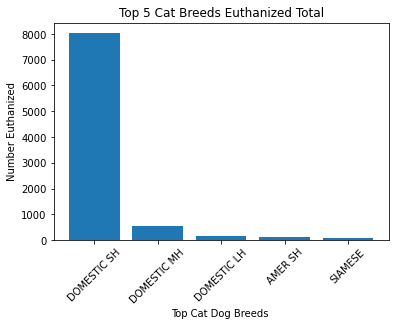

In [18]:
cat_euth = euth_df.loc[euth_df['Animal Type'] == 'CAT']
cat_count = cat_euth['Animal Breed'].value_counts().head()
plt.bar(cat_count.index,cat_count)
plt.xticks(rotation=45)
plt.title('Top 5 Cat Breeds Euthanized Total')
plt.xlabel('Top Cat Dog Breeds ')
plt.ylabel('Number Euthanized')
plt.show()

# top 5 dog breeds euthanized

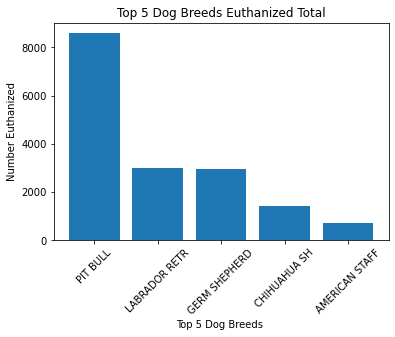

In [4]:
dog_euth = euth_df.loc[euth_df['Animal Type'] == 'DOG']
dog_count = dog_euth['Animal Breed'].value_counts().head()
plt.bar(dog_count.index,dog_count)
plt.xticks(rotation=45)
plt.title('Top 5 Dog Breeds Euthanized Total')
plt.xlabel('Top 5 Dog Breeds ')
plt.ylabel('Number Euthanized')
plt.show()

In [ ]:
# 

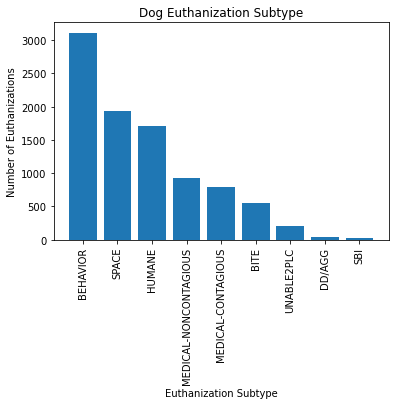

In [47]:
# dog by euthanization subtype
sub_dog = sub_euth.loc[sub_euth['Animal Type'] == 'DOG'] 
sub_dog_count = sub_dog['Outcome Subtype'].value_counts()
plt.bar(sub_dog_count.index,sub_dog_count)
plt.xticks(rotation=90)
plt.title('Dog Euthanization Subtype')
plt.xlabel('Euthanization Subtype')
plt.ylabel('Number of Euthanizations')
plt.show()

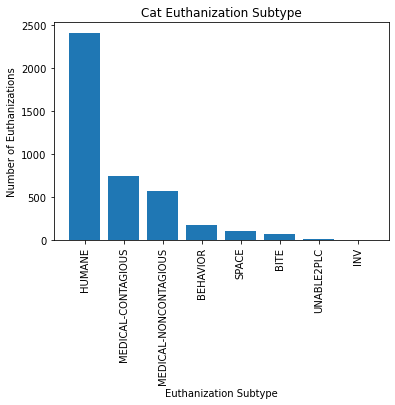

,Outcome Subtype_x,Outcome Subtype_y
HUMANE,2412,1709
MEDICAL-CONTAGIOUS,738,799
MEDICAL-NONCONTAGIOUS,571,926
BEHAVIOR,173,3114
SPACE,98,1932
BITE,68,554
UNABLE2PLC,10,202


In [51]:
# cat by euthanization subtype
sub_cat = sub_euth.loc[sub_euth['Animal Type'] == 'CAT']
sub_cat_count = sub_cat['Outcome Subtype'].value_counts()
plt.bar(sub_cat_count.index, sub_cat_count)
plt.xticks(rotation=90)
plt.title('Cat Euthanization Subtype')
plt.xlabel('Euthanization Subtype')
plt.ylabel('Number of Euthanizations')
plt.show()
merge = pd.merge(sub_cat_count,sub_dog_count,left_index= True,right_index= True)
merge

# Euthanizations per year 

In [27]:
data_2016 = shelter_data_df.loc[shelter_data_df['Year']=='FY2016']
data_2017 = shelter_data_df.loc[shelter_data_df['Year']=='FY2017']
data_2018 = shelter_data_df.loc[shelter_data_df['Year']=='FY2018']
data_2019 = shelter_data_df.loc[shelter_data_df['Year']=='FY2019']
data_2020 = shelter_data_df.loc[shelter_data_df['Year']=='FY2020']
data_2021 = shelter_data_df.loc[shelter_data_df['Year']=='FY2021']

C:\Users\slaye\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


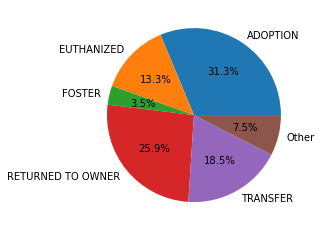

In [37]:
def Outcomes(year):
    data = pd.DataFrame(year.groupby('Outcome Type')['Outcome Type'].agg(['count']))
    greater = data.loc[data['count'] >= 1000]
    lesser = data.loc[data['count'] <= 1000]
    greater['Index'] = greater.index
    other_count = lesser.sum()
    other_row = pd.DataFrame({'count':other_count,'Index': 'Other'})
    final = greater.append(other_row,ignore_index=True)
    plt.pie(final['count'],labels = final['Index'],autopct='%1.1f%%')
Outcomes(data_2019)

# Percent euthanized vs. adopted

In [30]:
def euthyear(year):
    euth_year = year.loc[year['Outcome Type'] == 'EUTHANIZED']
    print(euth_year['Animal Type'].value_counts())
euthyear(data_2021)

DOG          460
CAT          218
WILDLIFE     201
BIRD          14
LIVESTOCK      1
Name: Animal Type, dtype: int64


# Linear Regression of euthanizations per year 